<a href="https://colab.research.google.com/github/Mrrohit0806/Capstone-project-01/blob/main/Outlire_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
df = pd.read_csv('/content/FE_gurgaon_properties_cleaned_lev_03.csv').drop_duplicates()

In [90]:
df.head()

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,price,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,15793.0,Super Built up area 1260(117.06 sq.m.),1260.0,2,2,2,26.0,NaN,Under Construction,1.99,NaN,1260.0,NaN,NaN,0,0,0,0,0,0,48
1,flat,trisara our homes 3,sohna road,4339.0,Built Up area: 484 (44.97 sq.m.),484.0,1,1,0,2.0,NaN,Undefined,0.21,NaN,NaN,484.0,NaN,0,0,0,0,0,0,0
2,flat,sare crescent parc,sector 92,5000.0,Super Built up area 1000(92.9 sq.m.),1000.0,2,2,3,2.0,NaN,Moderately Old,0.50,NaN,1000.0,NaN,NaN,0,0,0,0,0,0,38
3,house,independent,sector 40,40135.0,Plot area 263(219.9 sq.m.),2367.0,12,12,3+,4.0,NaN,New Property,NaN,9.5,NaN,2367.0,NaN,0,0,1,0,0,2,57
4,flat,breez global heights,sohna road,6420.0,Super Built up area 623(57.88 sq.m.),654.0,2,2,2,2.0,NaN,New Property,0.42,NaN,623.0,NaN,NaN,0,0,0,0,0,0,73


In [91]:
df.shape

(3832, 24)

In [92]:
# drop price coloum
df = df.drop('price', axis=1)

/tmp/ipython-input-2916595214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_in_Crore'])


<Axes: xlabel='Price_in_Crore', ylabel='Density'>

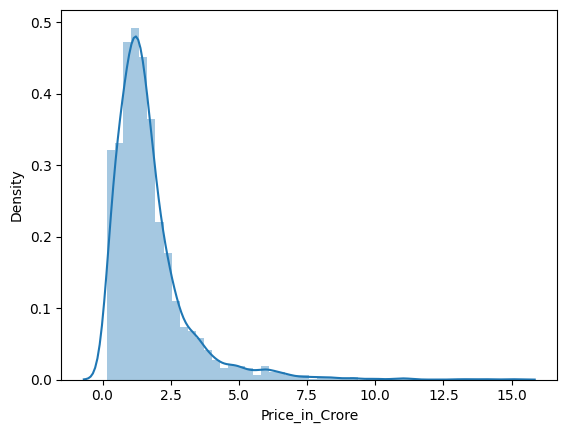

In [93]:
# outliers on the basis of price column
sns.distplot(df['Price_in_Crore'])

<Axes: xlabel='Price_in_Crore'>

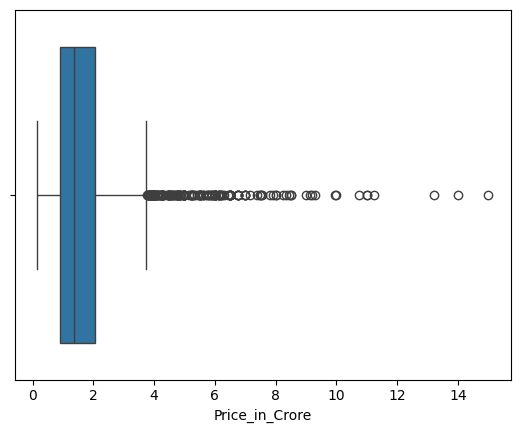

In [94]:
sns.boxplot(x=df['Price_in_Crore'])

In [95]:
# Calculate the IQR for the 'price_in_crore' column

Q1 = df['Price_in_Crore'].quantile(0.25)
Q3 = df['Price_in_Crore'].quantile(0.75)
IQR = Q3 - Q1

# Define bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price_in_Crore'] < lower_bound) | (df['Price_in_Crore'] > upper_bound)]

#Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['Price_in_Crore'].describe()

num_outliers, outliers_price_stats

(190,
 count    190.000000
 mean       5.654947
 std        1.918374
 min        3.780000
 25%        4.250000
 50%        5.000000
 75%        6.237500
 max       15.000000
 Name: Price_in_Crore, dtype: float64)

In [96]:
outliers.sort_values('Price_in_Crore',ascending=False).head(20)

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3353,flat,central park resorts,sector 48,22388.0,Carpet area: 6700 (622.45 sq.m.),6700.0,5,6,3+,17.0,NaN,Relatively New,15.00,NaN,NaN,6700.0,1,1,0,1,0,1,45
412,flat,ambience caitriona,sector 24,200000.0,Built Up area: 700 (65.03 sq.m.),700.0,4,5,3,3.0,East,Undefined,14.00,NaN,700.0,NaN,0,0,0,0,0,0,0
3687,flat,m3m golfestate,sector 65,12000.0,Carpet area: 11000 (1021.93 sq.m.),11000.0,4,4,3,13.0,North,Moderately Old,13.20,NaN,NaN,11000.0,0,1,0,0,0,0,60
2427,flat,central park resorts,sector 48,28266.0,Carpet area: 3980 (369.75 sq.m.),3980.0,4,5,3+,2.0,North-West,Relatively New,11.25,NaN,NaN,3980.0,0,1,0,1,0,0,45
3825,flat,dlf the crest,sector 54,35483.0,Carpet area: 3100 (288 sq.m.),3100.0,4,5,3+,7.0,North-East,Relatively New,11.00,NaN,NaN,3100.0,1,1,0,1,0,0,49
3789,flat,dlf the crest,sector 54,35222.0,Super Built up area 3123(290.14 sq.m.),3123.0,4,6,3,7.0,NaN,Relatively New,11.00,3123.0,NaN,NaN,0,1,0,0,0,1,125
2784,flat,pioneer araya,sector 62,19500.0,Super Built up area 5514(512.27 sq.m.),5513.0,5,7,3,10.0,North-East,Relatively New,10.75,5514.0,NaN,NaN,0,1,0,0,0,2,153
2172,flat,dlf the belaire,sector 54,24557.0,Super Built up area 4072(378.3 sq.m.)Built Up ...,4072.0,4,5,3+,17.0,North,Moderately Old,10.00,NaN,3000.0,2800.0,0,1,0,0,0,1,167
2382,flat,pioneer araya,sector 62,20995.0,Super Built up area 4739(440.27 sq.m.)Carpet a...,4739.0,4,6,3,12.0,South-East,Relatively New,9.95,NaN,NaN,3219.0,0,1,0,1,0,2,138
1904,flat,central park resorts,sector 48,24926.0,Super Built up area 3931(365.2 sq.m.)Built Up ...,3731.0,4,4,3+,10.0,North-East,Moderately Old,9.30,NaN,3831.0,3731.0,1,1,1,1,0,2,67


In [ ]:
# All Outliers are in range

/tmp/ipython-input-2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

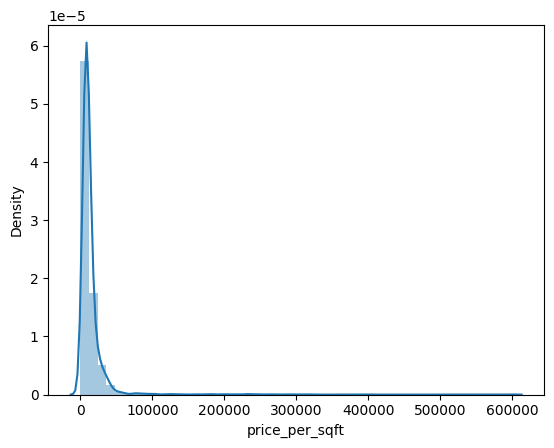

In [97]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

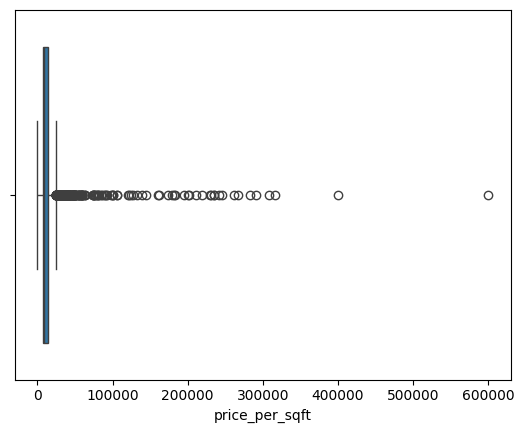

In [98]:
sns.boxplot(x=df['price_per_sqft'])

In [99]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(371,
 count       371.000000
 mean      53737.811321
 std       60660.260648
 min       24489.000000
 25%       28249.500000
 50%       33951.000000
 75%       43899.500000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [100]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

/tmp/ipython-input-205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [101]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['Price_in_Crore']*10000000)/outliers_sqft['area'])

/tmp/ipython-input-3898626644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['Price_in_Crore']*10000000)/outliers_sqft['area'])


In [102]:
outliers_sqft['price_per_sqft'].describe()

,price_per_sqft
count,29.000000
mean,25973.862069
std,11034.045249
min,2993.000000
25%,24689.000000
50%,26087.000000
75%,29545.000000
max,57508.000000


In [103]:
df.update(outliers_sqft)

In [104]:
df.shape

(3832, 23)

/tmp/ipython-input-2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

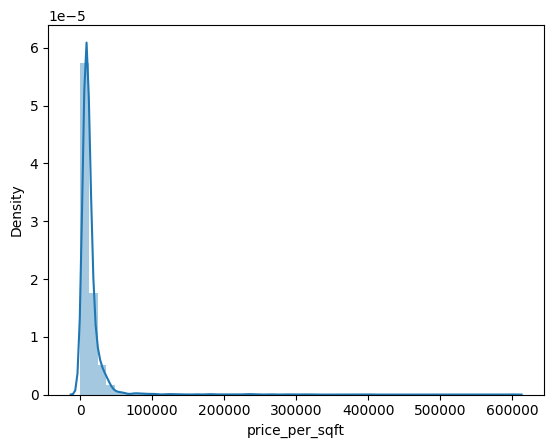

In [105]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

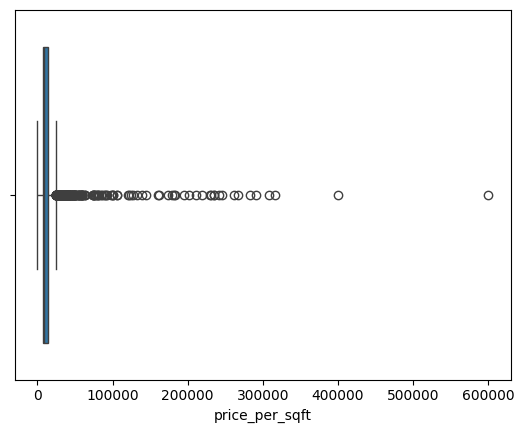

In [106]:
sns.boxplot(x=df['price_per_sqft'])

In [107]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
142,house,independent,sector 9,55000.0,Plot area 200(18.58 sq.m.),1800.0,4,3,1,2.0,North-East,Old Property,NaN,NaN,200.0,NaN,0,0,0,0,0,0,0
246,house,independent,sector 4,105263.0,Plot area 57(5.3 sq.m.),513.0,3,3,1,2.0,NaN,Old Property,NaN,NaN,57.0,NaN,0,0,0,0,1,0,0
307,house,vatika india next,sector 82,194444.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,3240.0,4,4,3+,3.0,North-East,Relatively New,NaN,NaN,3900.0,3743.0,0,1,0,0,0,1,105
378,house,independent,sector 7,79365.0,Plot area 126(11.71 sq.m.),1134.0,2,2,0,0.0,NaN,Old Property,NaN,NaN,126.0,NaN,1,0,0,0,0,0,7
431,house,independent,sector 104,80000.0,Plot area 100(9.29 sq.m.),900.0,13,6,3+,3.0,South,Moderately Old,NaN,NaN,100.0,NaN,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,house,independent,sector 105,98214.0,Built Up area: 56 (5.2 sq.m.),504.0,4,4,0,2.0,NaN,Undefined,NaN,NaN,56.0,NaN,0,0,0,0,0,0,0
3748,house,independent,sector 3,80357.0,Built Up area: 112 (10.41 sq.m.),1008.0,3,3,0,2.0,NaN,Undefined,NaN,NaN,112.0,NaN,0,0,0,0,0,0,0
3791,house,unitech uniworld resorts,sector 33,181818.0,Plot area 550(51.1 sq.m.),4950.0,5,6,3,4.0,North-East,New Property,NaN,NaN,550.0,NaN,1,1,0,0,0,0,26
3857,house,independent,sector 54,234375.0,Plot area 160(14.86 sq.m.),1440.0,4,4,3,3.0,East,Moderately Old,NaN,NaN,160.0,NaN,0,1,0,0,0,2,13


In [108]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

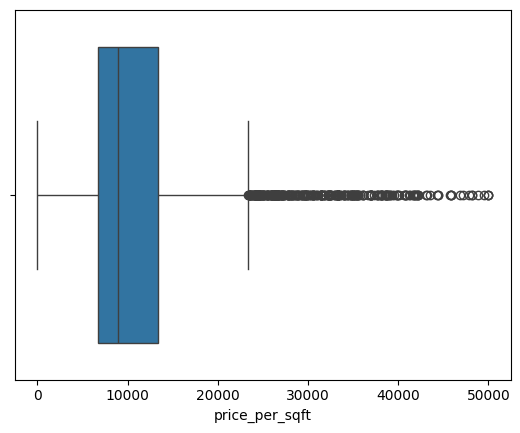

In [109]:
sns.boxplot(x=df['price_per_sqft'])

**Area**

/tmp/ipython-input-91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

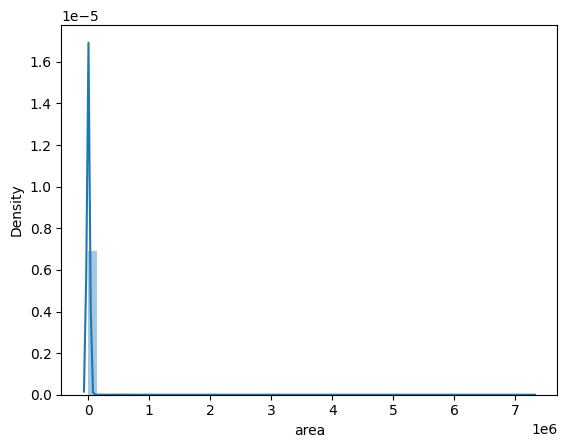

In [110]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

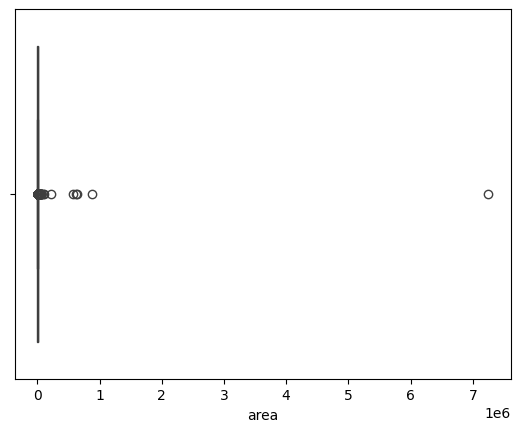

In [111]:
sns.boxplot(x=df['area'])

In [112]:
df['area'].describe()

,area
count,3.740000e+03
mean,4.866339e+03
std,1.207014e+05
min,1.450000e+02
25%,1.250000e+03
50%,1.744000e+03
75%,2.340000e+03
max,7.250000e+06


In [113]:
df[df['area'] > 100000]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
393,house,independent,pataudi road,2.0,Plot area 200(809372 sq.m.),7250000.0,4,3,3+,3.0,South,Moderately Old,NaN,NaN,200.0,NaN,0,0,0,0,0,0,0
1982,flat,hcbs sports ville,sohna road,4.0,Built Up area: 737147 (68483.2 sq.m.),875000.0,2,2,2,8.0,NaN,Relatively New,0.35,NaN,737147.0,NaN,0,0,0,0,0,1,44
2129,flat,signature global solera 2,sector 107,9.0,Carpet area: 514396 (47788.95 sq.m.),566667.0,2,2,1,3.0,North,New Property,0.51,NaN,NaN,514396.0,0,0,0,0,0,0,44
2548,house,independent,sector 50,232.0,Plot area 2(1011.71 sq.m.),215517.0,6,5,3+,2.0,NaN,New Property,NaN,NaN,2.0,NaN,1,1,0,1,1,2,0
2793,flat,ramsons kshitij,sector 95,5.0,Carpet area: 607936 (56479.1 sq.m.),620000.0,2,2,1,1.0,North-East,Relatively New,0.31,NaN,NaN,607936.0,1,0,0,0,1,0,65
3755,flat,signature the roselia,sector 95,7.0,Carpet area: 569243 (52884.41 sq.m.),642857.0,2,2,2,2.0,South-West,New Property,0.45,NaN,NaN,569243.0,0,0,0,0,0,0,76


In [114]:
df = df[df['area'] < 100000]

/tmp/ipython-input-91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

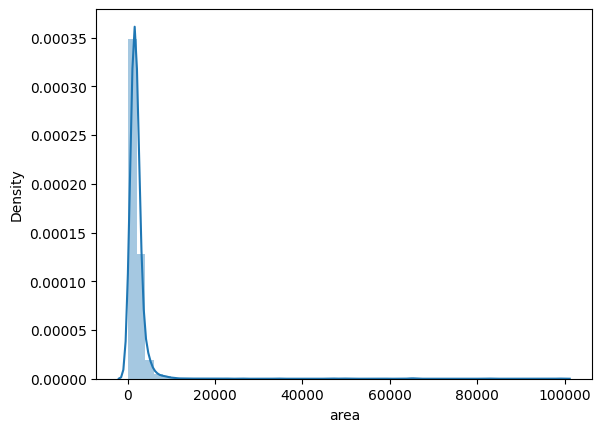

In [115]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

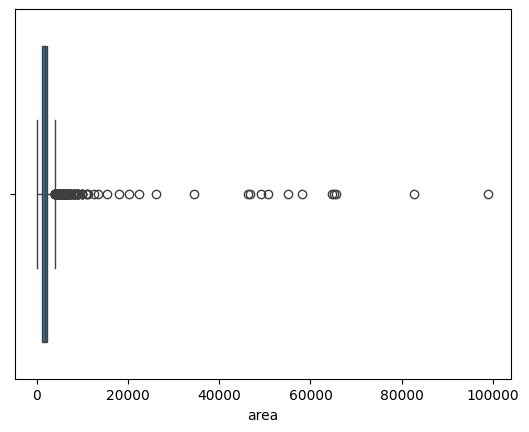

In [116]:
sns.boxplot(x=df['area'])

In [117]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
79,house,independent,sector 26,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,98978.0,6,8,3+,4.0,South,Relatively New,NaN,NaN,NaN,11000.00,0,1,1,1,0,2,60
3371,house,ganpati heights apartment,sector 13,151.0,Plot area 115(7692.86 sq.m.),82781.0,10,6,2,3.0,South-East,Old Property,NaN,NaN,115.0,NaN,0,0,0,0,1,0,7
3953,flat,rof ananda,sector 95,58.0,Carpet area: 64412 (5984.07 sq.m.),65517.0,3,2,1,12.0,North,Relatively New,0.380,NaN,NaN,64412.00,0,0,0,0,0,0,51
2897,house,dlf city plot phase 4,sector 28,1992.0,Carpet area: 7250 (6061.92 sq.m.),65261.0,10,10,3+,1.0,NaN,Undefined,NaN,NaN,NaN,7250.00,0,0,0,0,0,0,0
3909,flat,rof ananda,sector 95,58.0,Carpet area: 64529 (5994.94 sq.m.),64655.0,2,2,2,10.0,East,New Property,0.375,NaN,NaN,64529.00,1,0,0,0,0,0,15
2033,flat,pyramid elite,sector 86,79.0,Carpet area: 58141 (5401.48 sq.m.),58228.0,2,2,1,0.0,NaN,Under Construction,0.460,NaN,NaN,58141.00,0,0,0,0,0,0,15
1772,flat,rof ananda,sector 95,60.0,Carpet area: 54917 (5101.96 sq.m.),55000.0,2,2,1,13.0,South-West,Relatively New,0.330,NaN,NaN,54917.00,0,0,0,0,0,0,37
827,house,independent,mayfield garden,1087.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,50598.0,8,8,2,3.0,North-East,Relatively New,NaN,NaN,8260.0,4860.00,0,0,0,1,0,2,49
29,flat,signature the serenas,sohna road,57.0,Carpet area: 48811 (4534.69 sq.m.),49123.0,1,1,2,1.0,North-West,Relatively New,0.280,NaN,NaN,48811.00,1,0,0,0,0,0,37
2846,house,independent,sector 25,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,46795.0,9,9,2,3.0,North-West,Relatively New,NaN,NaN,5800.0,5200.00,0,1,1,0,0,2,109


In [118]:
df.loc[3371,'area'] = 115*9
df.loc[2897,'area'] = 7250
df.loc[827,'area'] = 8260
df.loc[79,'area'] = 11000
df.loc[827,'area'] = 8260


/tmp/ipython-input-91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

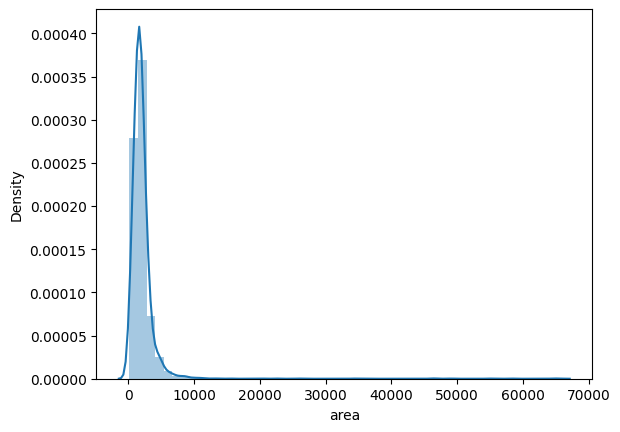

In [119]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

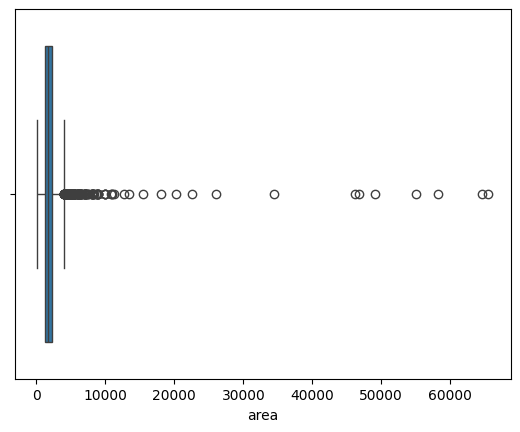

In [120]:
sns.boxplot(x=df['area'])

In [121]:
df['area'].describe()

,area
count,3734.000000
mean,2078.198447
std,2774.323511
min,145.000000
25%,1246.250000
50%,1743.000000
75%,2328.000000
max,65517.000000


**Bedroom**

/tmp/ipython-input-1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

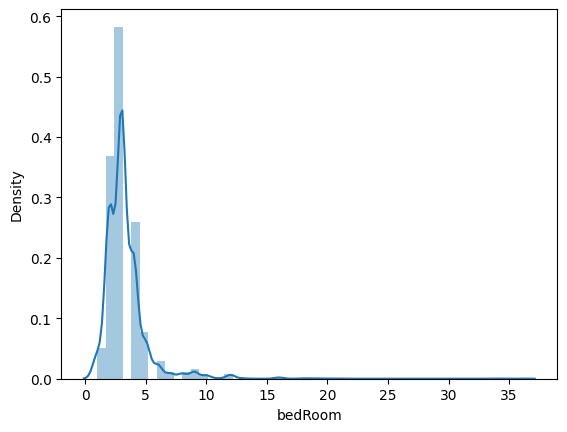

In [122]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

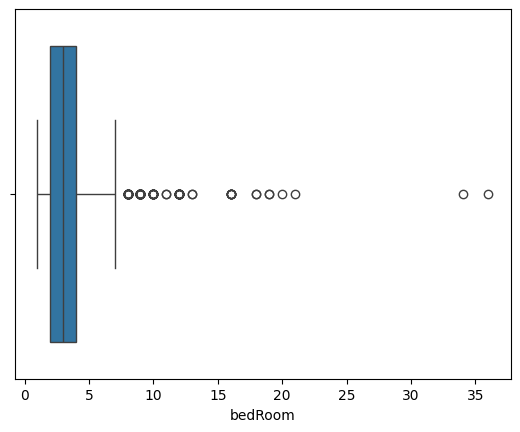

In [123]:
sns.boxplot(x=df['bedRoom'])

In [124]:
df['bedRoom'].describe()

,bedRoom
count,3734.000000
mean,3.322978
std,1.921336
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,36.000000


In [125]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
724,house,independent,west sector 13,6944.0,Plot area 360(301.01 sq.m.),3240.0,36,36,2,3.0,East,Moderately Old,NaN,NaN,3240.0,NaN,0,1,0,0,0,0,7
3102,house,manohar nagar,manohar nagar,12444.0,Plot area 500(418.06 sq.m.)Built Up area: 500 ...,4500.0,34,34,3+,4.0,NaN,New Property,NaN,NaN,500.0,NaN,0,0,0,0,0,2,0
868,house,independent,sector 54,43066.0,Plot area 129(107.86 sq.m.),1161.0,21,21,3+,5.0,North,Relatively New,NaN,NaN,1161.0,NaN,0,1,0,0,0,1,49
417,house,independent,sector 43,39062.0,Plot area 128(107.02 sq.m.),1152.0,20,20,3+,4.0,East,Relatively New,NaN,NaN,1152.0,NaN,0,1,0,0,0,1,22
3153,house,independent,sector 17a,5160.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,7500.0,19,17,3+,5.0,North-West,Relatively New,NaN,NaN,7500.0,NaN,1,0,1,0,0,0,68
960,house,independent,sector 17a,24214.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,1623.0,19,17,3,4.0,North-West,Relatively New,NaN,NaN,1622.0,NaN,1,1,1,1,0,0,74
654,house,private house,sector 55,46906.0,Plot area 167(139.63 sq.m.),1503.0,18,18,3+,4.0,North-East,Relatively New,NaN,NaN,1503.0,NaN,0,0,0,0,1,1,57
3803,house,independent,sector 54,38194.0,Plot area 160(133.78 sq.m.),1440.0,18,18,3+,4.0,South-West,Relatively New,NaN,NaN,1440.0,NaN,0,1,0,0,0,1,70
550,house,luxury dlf city floors,sector 26,48889.0,Plot area 500(418.06 sq.m.),4091.0,16,16,3+,4.0,NaN,New Property,NaN,NaN,500.0,NaN,0,1,0,0,0,2,31
3180,house,independent,sector 56,45889.0,Plot area 300(250.84 sq.m.),2700.0,16,18,3+,4.0,North-East,New Property,NaN,NaN,2700.0,NaN,0,1,0,1,0,2,49


In [126]:
df = df[df['bedRoom'] <= 10]

In [127]:
df.shape

(3693, 23)

/tmp/ipython-input-1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

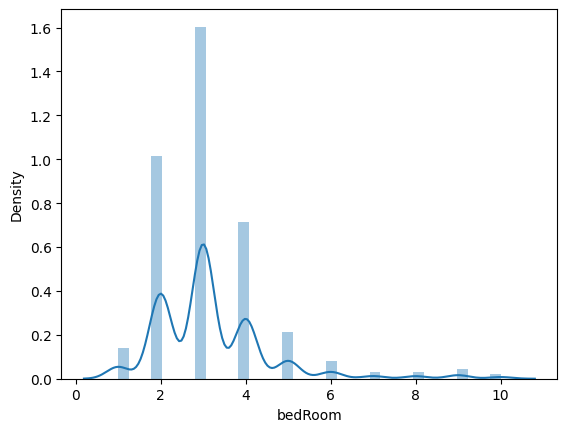

In [128]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

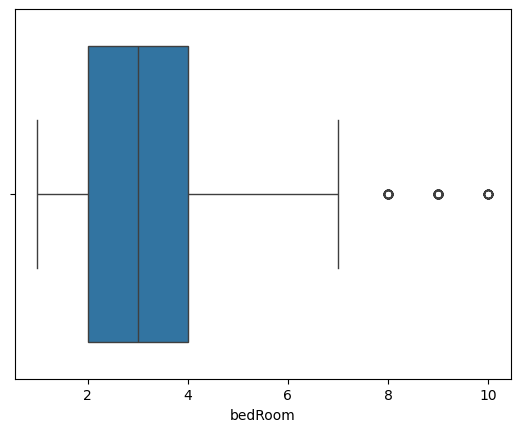

In [129]:
sns.boxplot(x=df['bedRoom'])

In [130]:
df['bedRoom'].describe()

,bedRoom
count,3693.000000
mean,3.194963
std,1.387885
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


**Bathroom**

/tmp/ipython-input-2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

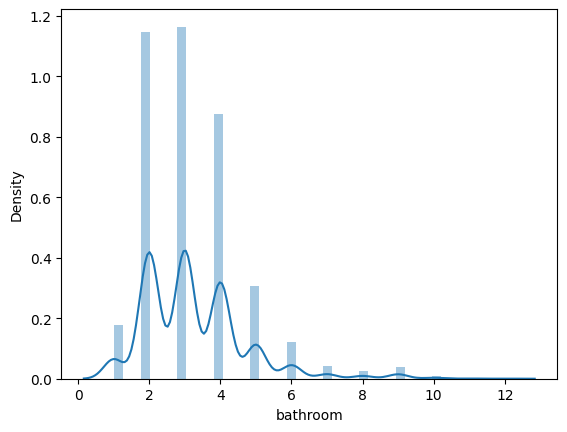

In [131]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

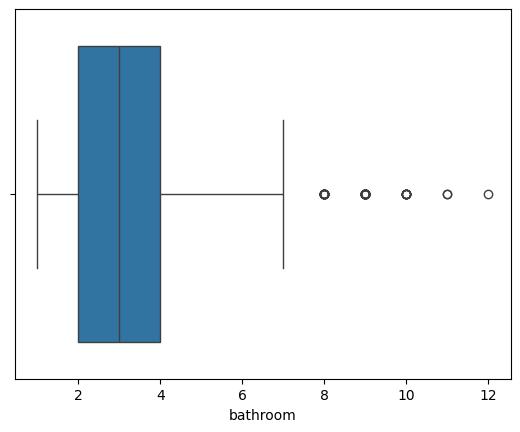

In [132]:
sns.boxplot(x=df['bathroom'])

In [133]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
551,house,adani brahma samsara,sector 60,28200.0,Built Up area: 6390 (593.65 sq.m.),6390.0,9,12,3+,3.0,North-East,Relatively New,NaN,NaN,6390.0,NaN,0,1,0,0,0,2,146
1219,house,independent,sector 39,10000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,7000.0,10,11,3+,4.0,South-East,Relatively New,NaN,NaN,7000.0,NaN,0,0,0,1,0,2,38
3077,house,independent,sector 24,28898.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,3806.0,8,11,3+,3.0,East,Old Property,NaN,NaN,5000.0,NaN,1,1,0,1,1,2,39



**super built up area**

/tmp/ipython-input-4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

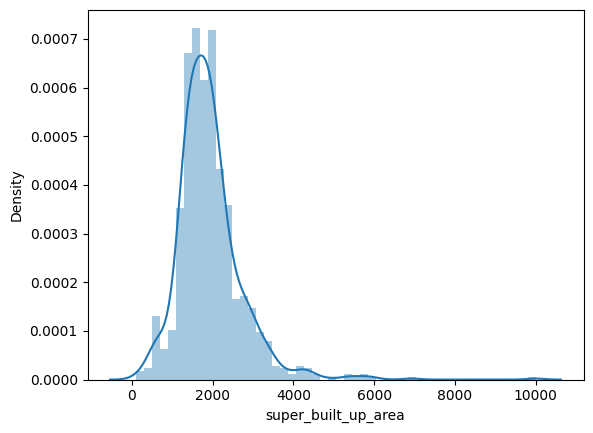

In [134]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

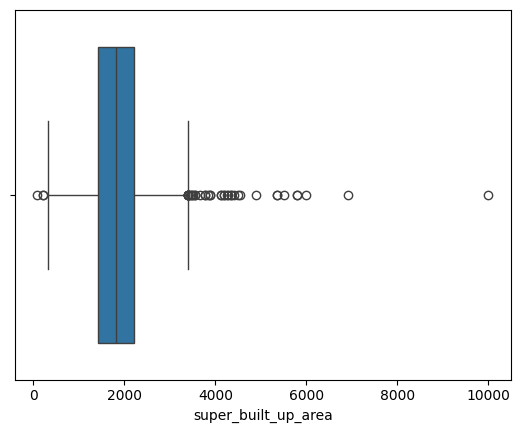

In [135]:
sns.boxplot(x=df['super_built_up_area'])

In [136]:
df['super_built_up_area'].describe()

,super_built_up_area
count,886.000000
mean,1929.065553
std,817.869491
min,89.000000
25%,1430.000000
50%,1819.000000
75%,2215.000000
max,10000.000000


In [137]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2281,flat,bestech park view grand spa,sector 81,6786.0,Super Built up area 6926(643.45 sq.m.),6926.0,4,4,3+,19.0,North,Relatively New,4.7,6926.0,NaN,NaN,0,1,0,0,0,2,140
2609,flat,krrish provence estate,gwal pahari,7500.0,Super Built up area 10000(929.03 sq.m.),10000.0,5,6,3+,23.0,North-East,Relatively New,7.5,10000.0,NaN,NaN,0,1,0,1,1,0,49


**built up area**

/tmp/ipython-input-3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

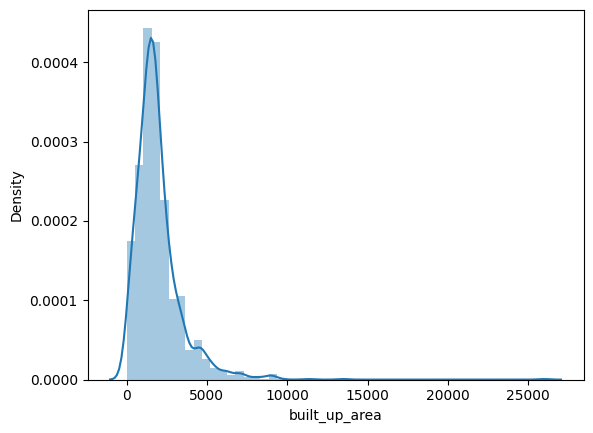

In [138]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

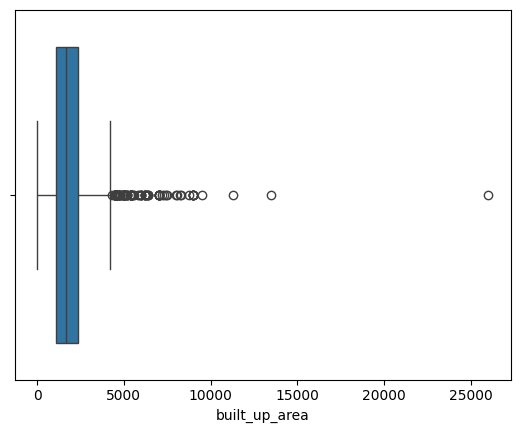

In [139]:
sns.boxplot(x=df['built_up_area'])

In [140]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
234,house,independent,sector 4,630.0,Plot area 1500(1254.19 sq.m.),13492.0,3,3,1,1.0,North,Relatively New,NaN,NaN,13500.0,NaN,0,0,0,0,1,0,0
1624,house,independent,sector 3 phase i,557.0,Plot area 26000(2415.48 sq.m.),26032.0,4,4,2,2.0,East,Moderately Old,NaN,NaN,26000.0,NaN,0,1,0,1,0,0,62
3245,house,independent,sector 43,24366.0,Plot area 1254(1048.5 sq.m.),11286.0,6,7,3+,3.0,North-East,Relatively New,NaN,NaN,11286.0,NaN,1,1,0,1,1,2,42


**carpet area**

/tmp/ipython-input-3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

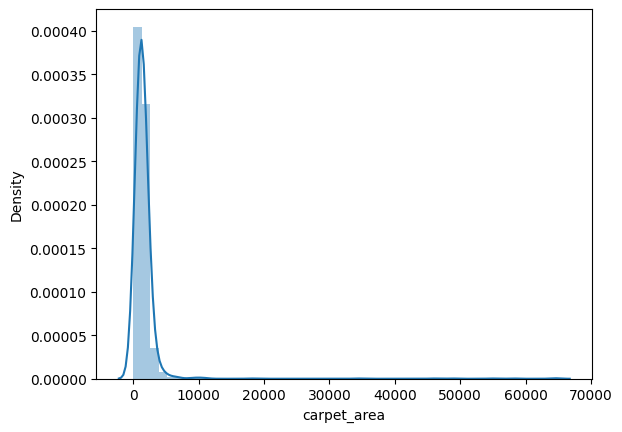

In [141]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

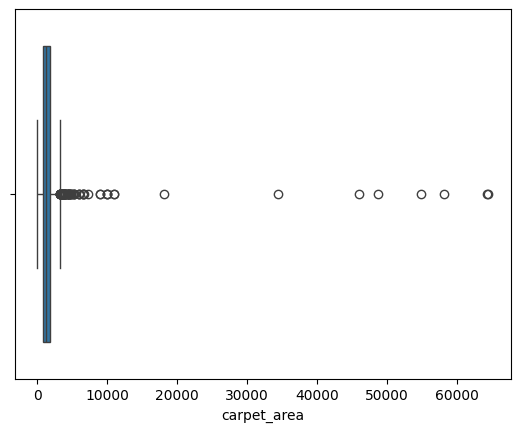

In [142]:
sns.boxplot(x=df['carpet_area'])

In [143]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
29,flat,signature the serenas,sohna road,57.0,Carpet area: 48811 (4534.69 sq.m.),49123.0,1,1,2,1.0,North-West,Relatively New,0.280,NaN,NaN,48811.0,1,0,0,0,0,0,37
79,house,independent,sector 26,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,11000.0,6,8,3+,4.0,South,Relatively New,NaN,NaN,NaN,11000.0,0,1,1,1,0,2,60
1556,flat,godrej air,sector 85,1379.0,Carpet area: 18122 (1683.59 sq.m.),18129.0,4,5,3+,16.0,North-East,Under Construction,2.500,NaN,NaN,18122.0,1,0,0,1,1,2,44
1772,flat,rof ananda,sector 95,60.0,Carpet area: 54917 (5101.96 sq.m.),55000.0,2,2,1,13.0,South-West,Relatively New,0.330,NaN,NaN,54917.0,0,0,0,0,0,0,37
2033,flat,pyramid elite,sector 86,79.0,Carpet area: 58141 (5401.48 sq.m.),58228.0,2,2,1,0.0,NaN,Under Construction,0.460,NaN,NaN,58141.0,0,0,0,0,0,0,15
3325,flat,ramsons kshitij,sector 95,53.0,Carpet area: 45966 (4270.38 sq.m.),46226.0,2,2,1,10.0,North-West,Relatively New,0.245,NaN,NaN,45966.0,0,0,0,0,1,0,33
3687,flat,m3m golfestate,sector 65,12000.0,Carpet area: 11000 (1021.93 sq.m.),11000.0,4,4,3,13.0,North,Moderately Old,13.200,NaN,NaN,11000.0,0,1,0,0,0,0,60
3862,flat,rof ananda,sector 95,61.0,Carpet area: 34401 (3195.96 sq.m.),34426.0,1,1,1,13.0,North,Relatively New,0.210,NaN,NaN,34401.0,0,0,0,0,0,0,68
3909,flat,rof ananda,sector 95,58.0,Carpet area: 64529 (5994.94 sq.m.),64655.0,2,2,2,10.0,East,New Property,0.375,NaN,NaN,64529.0,1,0,0,0,0,0,15
3953,flat,rof ananda,sector 95,58.0,Carpet area: 64412 (5984.07 sq.m.),65517.0,3,2,1,12.0,North,Relatively New,0.380,NaN,NaN,64412.0,0,0,0,0,0,0,51


/tmp/ipython-input-3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

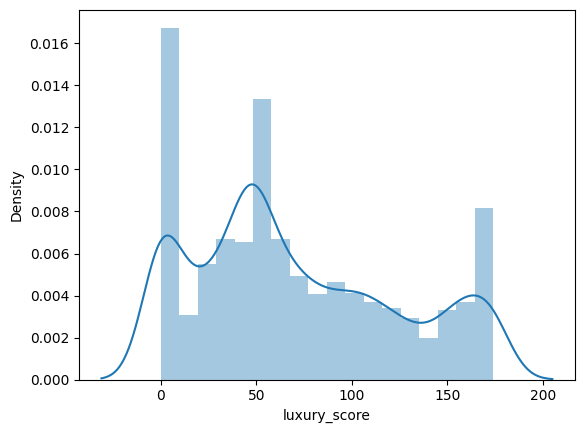

In [144]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

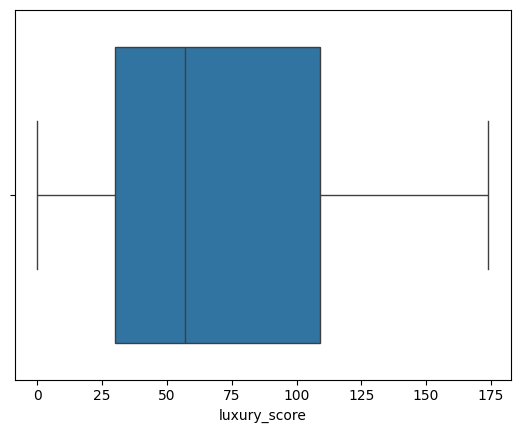

In [145]:
sns.boxplot(x = df['luxury_score'])

In [146]:
df.shape

(3693, 23)

In [147]:
df.head()

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,15793.0,Super Built up area 1260(117.06 sq.m.),1260.0,2,2,2,26.0,NaN,Under Construction,1.99,1260.0,NaN,NaN,0,0,0,0,0,0,48
1,flat,trisara our homes 3,sohna road,4339.0,Built Up area: 484 (44.97 sq.m.),484.0,1,1,0,2.0,NaN,Undefined,0.21,NaN,484.0,NaN,0,0,0,0,0,0,0
2,flat,sare crescent parc,sector 92,5000.0,Super Built up area 1000(92.9 sq.m.),1000.0,2,2,3,2.0,NaN,Moderately Old,0.50,1000.0,NaN,NaN,0,0,0,0,0,0,38
4,flat,breez global heights,sohna road,6420.0,Super Built up area 623(57.88 sq.m.),654.0,2,2,2,2.0,NaN,New Property,0.42,623.0,NaN,NaN,0,0,0,0,0,0,73
5,flat,godrej air,sector 85,14541.0,Super Built up area 1400(130.06 sq.m.)Carpet a...,894.0,2,2,3,30.0,NaN,Under Construction,1.30,NaN,NaN,894.0,0,0,0,0,0,0,111


In [148]:
df['price_per_sqft'] = round((df['Price_in_Crore']*10000000)/df['area'])

/tmp/ipython-input-2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

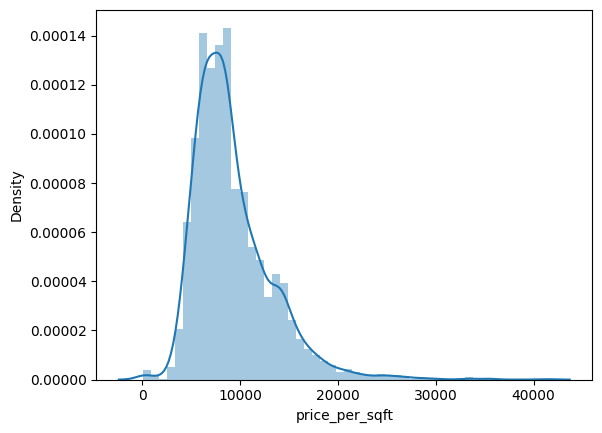

In [63]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

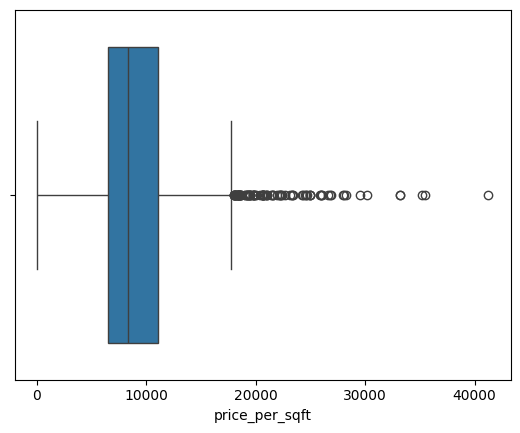

In [149]:
sns.boxplot(x = df['price_per_sqft'])

In [150]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [151]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(294.25)

In [152]:
df[(df['area']/df['bedRoom'])<294]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,flat,gls avenue 51,sector 92,6000.0,Carpet area: 750 (69.68 sq.m.),750.0,3,3,1,10.0,North-East,Relatively New,0.450,NaN,NaN,750.0,0,0,0,0,0,0,0
11,house,independent,sector 11,NaN,Built Up area: 1300 (120.77 sq.m.),1300.0,5,3,0,1.0,NaN,Undefined,NaN,NaN,1300.0,NaN,0,0,0,0,0,0,0
17,house,independent,sector 12,NaN,Plot area 150(125.42 sq.m.)Built Up area: 2052...,1105.0,5,5,1,3.0,NaN,Old Property,NaN,NaN,2052.0,NaN,0,0,0,0,0,0,31
33,house,independent,sector 25,NaN,Plot area 150(125.42 sq.m.),1350.0,5,4,3,3.0,North,Old Property,NaN,NaN,1350.0,NaN,0,0,0,0,0,0,40
44,flat,breez global hill view,sohna road,5776.0,Carpet area: 554 (51.47 sq.m.),554.0,2,2,2,19.0,North,Relatively New,0.320,NaN,NaN,554.0,0,0,0,0,0,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,house,naman residency,sector 4,NaN,Plot area 450(41.81 sq.m.),450.0,2,2,2,2.0,West,New Property,NaN,NaN,450.0,NaN,1,1,0,1,1,0,14
3908,flat,signature global solera,sector 107,5828.0,Carpet area: 489 (45.43 sq.m.),489.0,2,2,2,11.0,South,Relatively New,0.285,NaN,NaN,489.0,0,0,0,0,0,0,45
3924,flat,mvn athens,sohna road,4211.0,Super Built up area 570(52.95 sq.m.),570.0,2,2,1,12.0,NaN,Relatively New,0.240,570.0,NaN,NaN,0,0,0,0,0,0,38
3946,house,independent,hira nagar,NaN,Plot area 562(52.21 sq.m.),562.0,3,2,1,1.0,North-East,Old Property,NaN,NaN,562.0,NaN,0,0,0,0,0,0,15


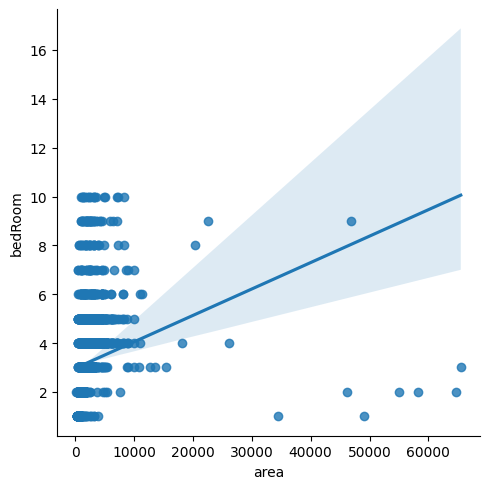

In [153]:
sns.lmplot(x='area',y='bedRoom',data=df)

In [154]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [155]:
(df[df['area_room_ratio'] < 294])['bedRoom'].value_counts()

,count
bedRoom,
2,137
3,49
5,48
4,31
6,24
9,23
8,13
7,11
10,10


In [156]:
df = df[df['area_room_ratio'] > 100]

In [157]:
df.shape

(3674, 24)

In [158]:
outliers_df = df[(df['area_room_ratio'] < 294) & (df['bedRoom'] > 3)]

In [159]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

/tmp/ipython-input-3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [160]:
df.update(outliers_df)

/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
/tmp/ipython-input-3159295313.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2. 1. 2. ... 2. 2. 2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.update(outliers_df)


In [161]:
df.shape

(3674, 24)

In [162]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [164]:
outliers_df_02 = df[(df['area_room_ratio'] < 295) & (df['bedRoom'] > 4)]

In [166]:
outliers_df_02

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
11,house,independent,sector 11,NaN,Built Up area: 1300 (120.77 sq.m.),1300.0,5.0,3,0,1.0,NaN,Undefined,NaN,NaN,1300.0,NaN,0,0,0,0,0,0,0,260.000000
94,house,"om nagar, sector-11",near khandsa road,NaN,Plot area 720(66.89 sq.m.),720.0,inf,2,1,0.0,East,Old Property,NaN,NaN,720.0,NaN,0,0,0,0,1,0,7,0.000000
194,house,independent,sector 7,NaN,Carpet area: 110 (91.97 sq.m.),990.0,5.0,4,2,1.0,North-East,Undefined,NaN,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
322,house,independent,manesar,NaN,Plot area 1782(165.55 sq.m.),1782.0,8.0,8,0,1.0,NaN,New Property,NaN,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
462,house,independent,sector 3 phase 2,NaN,Carpet area: 900 (83.61 sq.m.),900.0,5.0,3,3,1.0,NaN,Undefined,NaN,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
483,house,independent,shivaji nagar,NaN,Plot area 1400(130.06 sq.m.)Built Up area: 185...,1400.0,5.0,4,3,1.0,East,Old Property,NaN,NaN,1850.0,NaN,0,0,1,0,0,0,0,280.000000
533,house,independent,sector 2,NaN,Carpet area: 120 (100.34 sq.m.),1080.0,9.0,4,3,1.0,South,Undefined,NaN,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
1406,house,shivpuri,shivpuri,NaN,Plot area 2250(209.03 sq.m.),2250.0,10.0,7,3,1.0,NaN,Old Property,NaN,NaN,2250.0,NaN,1,1,0,1,1,2,0,225.000000
1422,house,independent,sector 11,NaN,Built Up area: 2250 (209.03 sq.m.),2250.0,10.0,1,0,1.0,NaN,New Property,NaN,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1847,house,independent,sector 12,NaN,Plot area 1800(167.23 sq.m.),1800.0,9.0,5,2,1.0,South-East,Old Property,NaN,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000


In [167]:
df.loc[94,'bedRoom'] = 2

In [168]:
outliers_df_02.shape

(17, 24)

In [171]:
df = df[~((df['area_room_ratio'] < 295) & (df['bedRoom'] > 4))]

In [172]:
df.shape

(3658, 24)

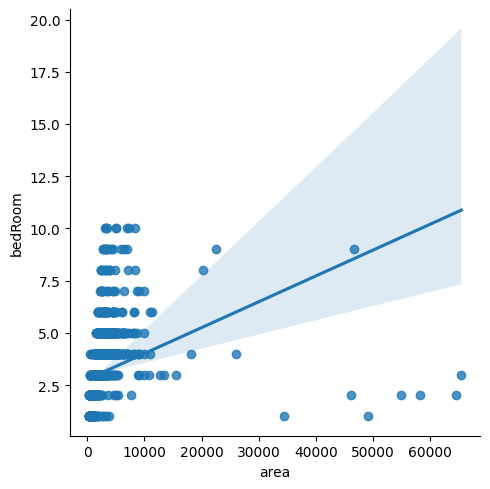

In [173]:
sns.lmplot(x='area',y='bedRoom',data=df)

In [174]:
df.to_csv('Gurgaon_properties_outlier_treated_02.csv', index = False)